<a href="https://colab.research.google.com/github/Likelipop/DQL_Trading_based/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
* [5.Evaluate Algorithms and Models](#5)
    * [5.1. Train Test Split](#5.1)
    * [5.2. Implementation steps and modules](#5.2)
    * [5.3. Agent Script](#5.3)
    * [5.4. Helper Function](#5.4)
    * [5.5. Training Set](#5.5)       

* [6.Test Set](#6)           

<a id='0'></a>
# 1. Problem Definition

<a id='2'></a>
# 2. Tải thư viện và Dữ liệu

<a id='2.1'></a>
## 2.1 Tải thư viện

In [1]:
!pip install vnstock
!pip install cufflinks
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00


In [2]:
import vnstock as vs
from vnstock import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys




    Khi tiếp tục sử dụng Vnstock3, bạn xác nhận rằng bạn đã đọc, hiểu và đồng ý với Chính sách quyền riêng tư và Điều khoản, điều kiện về giấy phép sử dụng Vnstock3.

    Chi tiết:

    - Giấy phép sử dụng phần mềm: https://vnstocks.com/docs/tai-lieu/giay-phep-su-dung
    - Chính sách quyền riêng tư: https://vnstocks.com/docs/tai-lieu/chinh-sach-quyen-rieng-tu
    


<a id='2.2'></a>
## 2.2 Tải dữ liệu

In [3]:
stock_VNM = Vnstock().stock(symbol='VNM', source='VCI')
stock_QNS = Vnstock().stock(symbol='QNS', source='VCI')
stock_MCM = Vnstock().stock(symbol='MCM', source='VCI')

2025-01-11 14:48:00 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2025-01-11 14:48:03 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2025-01-11 14:48:06 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [4]:
df_VNM = stock_VNM.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')
df_QNS = stock_QNS.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')
df_MCM = stock_MCM.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')


In [5]:
df_MCM.set_index('time', inplace=True)
df_VNM.set_index('time', inplace=True)
df_QNS.set_index('time', inplace=True)

In [6]:
list_milks = ['VNM', 'QNS', 'MCM']
milk_stocks = pd.concat([df_VNM,df_QNS,df_MCM],
                        axis=1,
                        keys=list_milks)
milk_stocks.columns.names = ['Milk Name', 'Stock Info']

In [7]:
print(f"VNM: {df_VNM.shape}    MCM: {df_MCM.shape}    QNS: {df_QNS.shape}")

VNM: (1501, 5)    MCM: (1002, 5)    QNS: (1501, 5)


In [8]:
df_VNM.describe()

,open,high,low,close,volume
count,1501.000000,1501.000000,1501.000000,1501.000000,1.501000e+03
mean,73.118314,73.758314,72.473511,73.060986,2.336367e+06
std,8.645751,8.658382,8.579413,8.640012,1.688750e+06
min,55.370000,57.420000,55.370000,55.370000,2.717300e+05
25%,65.590000,66.080000,64.930000,65.490000,1.154000e+06
50%,71.710000,72.360000,70.990000,71.660000,2.033574e+06
75%,79.360000,79.870000,78.710000,79.240000,3.001858e+06
max,96.060000,97.300000,95.150000,96.670000,2.116741e+07


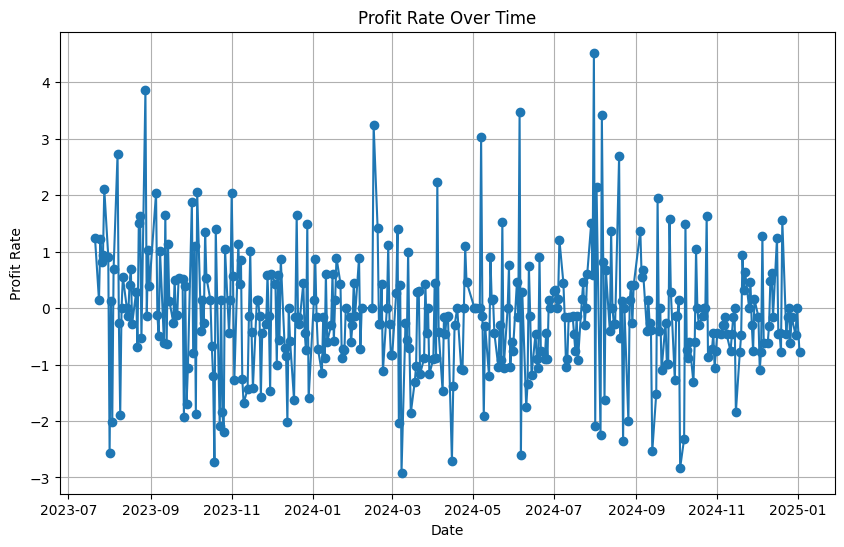

In [9]:
#Tinh ti suat loi nhuan ((close-open)/open)*100
df_VNM['profit rate'] = ((df_VNM['close']-df_VNM['open'])/df_VNM['open'])*100

# Giả sử df_VNM có cột 'date' là chỉ số thời gian và 'profit rate' là tỉ suất lợi nhuận
plt.figure(figsize=(10, 6))
plt.plot(df_VNM.index[-365:], df_VNM['profit rate'][-365:], marker='o')
plt.title('Profit Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Rate')
plt.grid(True)
plt.show()

#ti suat loi nhuan cang cao thi co phieu cang noi bat, kha nang sinh loi cang nhieu

Dựa vào biểu đồ tỉ suất lợi nhuận hàng ngày của cổ phiếu VNM từ tháng 7 năm 2023 đến tháng 1 năm 2025, chúng ta có thể rút ra một số phân tích sau:

1. **Biến Động Cao**:
   - Biểu đồ cho thấy tỉ suất lợi nhuận hàng ngày của VNM có sự dao động mạnh mẽ, dao động từ -3 đến 4. Điều này cho thấy cổ phiếu của Vinamilk có tính biến động cao trong giai đoạn này.

2. **Không Có Xu Hướng Rõ Rệt**:
   - Không có xu hướng tăng hoặc giảm dài hạn rõ ràng. Thay vào đó, tỉ suất lợi nhuận hàng ngày liên tục dao động, cho thấy thị trường có nhiều sự bất ổn và có thể chịu ảnh hưởng bởi các sự kiện kinh tế và tin tức.




In [10]:
value_milks = pd.DataFrame()
for name in list_milks:
  value_milks[name+' closed'] = milk_stocks[name]['close'].pct_change()*100
value_milks

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.


,VNM closed,QNS closed,MCM closed
time,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.885292,0.225124,NaN
2019-01-04,1.697078,-0.224618,NaN
2019-01-07,4.805521,-1.215669,NaN
2019-01-08,-0.766192,-2.643573,NaN
...,...,...,...
2024-12-26,-0.156495,1.374228,-0.286123
2024-12-27,0.000000,0.196464,0.430416
2024-12-30,-0.783699,-0.784314,-0.285714


<a id='3'></a>
# 3. Khai phá dữ liệu

<a id='3.1'></a>
## 3.1 Một vài phân tích cơ bản

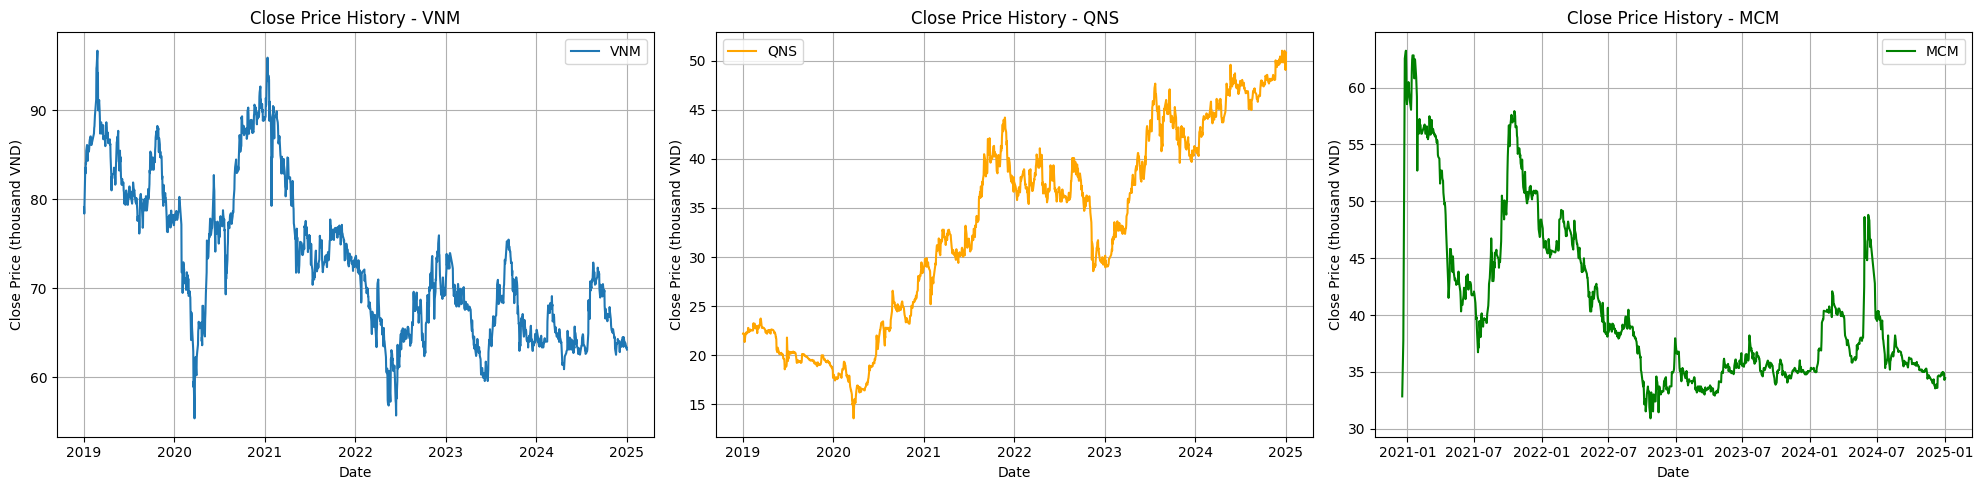

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Biểu đồ cho df_VNM
axs[0].plot(df_VNM.index, df_VNM['close'], label='VNM')
axs[0].set_title("Close Price History - VNM")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close Price (thousand VND)')
axs[0].grid(True)
axs[0].legend()

# Biểu đồ cho df_QNS
axs[1].plot(df_QNS.index, df_QNS['close'], label='QNS', color='orange')
axs[1].set_title("Close Price History - QNS")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close Price (thousand VND)')
axs[1].grid(True)
axs[1].legend()

# Biểu đồ cho df_MCM
axs[2].plot(df_MCM.index, df_MCM['close'], label='MCM', color='green')
axs[2].set_title("Close Price History - MCM")
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Close Price (thousand VND)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


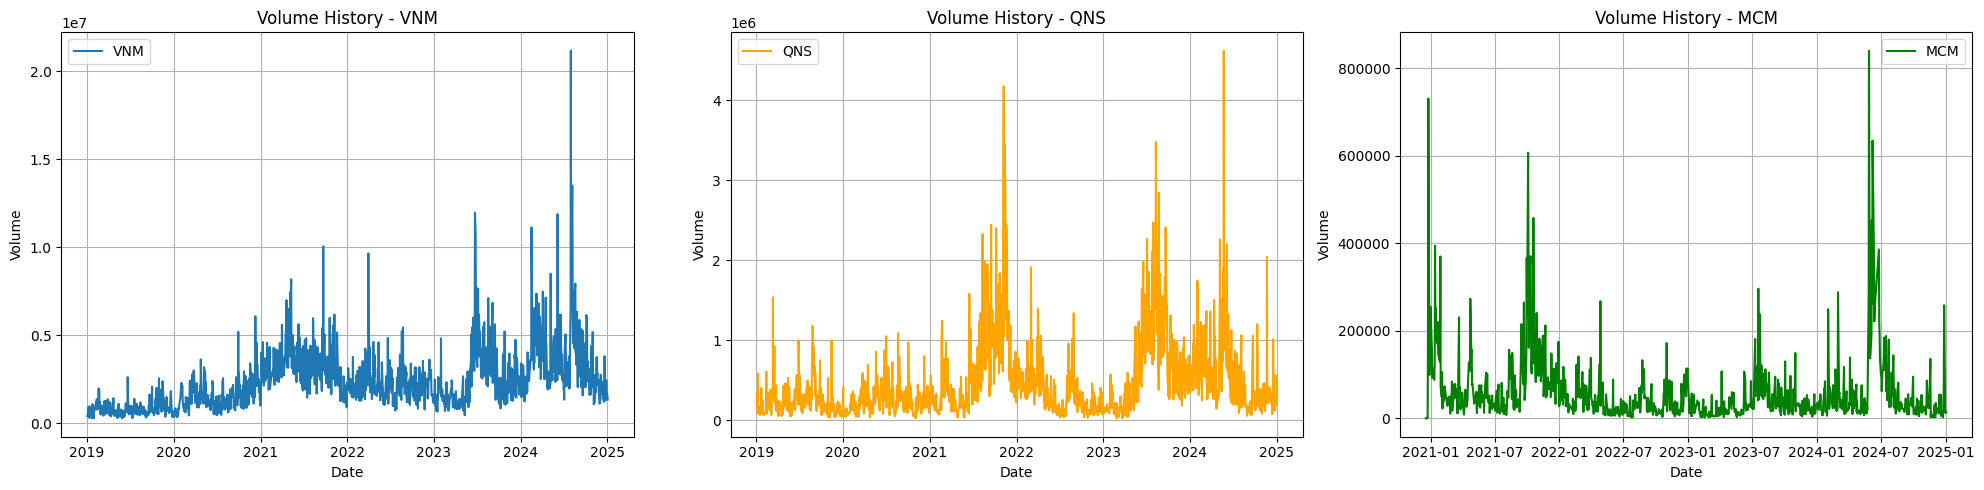

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Biểu đồ cho df_VNM
axs[0].plot(df_VNM.index, df_VNM['volume'], label='VNM')
axs[0].set_title("Volume History - VNM")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Volume')
axs[0].grid(True)
axs[0].legend()

# Biểu đồ cho df_QNS
axs[1].plot(df_QNS.index, df_QNS['volume'], label='QNS', color='orange')
axs[1].set_title("Volume History - QNS")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].grid(True)
axs[1].legend()

# Biểu đồ cho df_MCM
axs[2].plot(df_MCM.index, df_MCM['volume'], label='MCM', color='green')
axs[2].set_title("Volume History - MCM")
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Volume')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


In [13]:
import cufflinks as cf
import plotly.io as pio
cf.go_offline()
pio.renderers.default = 'colab'
milk_stocks.xs(key='close',axis=1,level='Stock Info').iplot(title='Giá đóng cửa ', xTitle='Năm', yTitle='Giá (K - VNĐ)')

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



Dựa trên dữ liệu giá đóng cửa của ba cổ phiếu VNM, QNS, và MCM từ năm 2019 đến 2025, chúng ta có thể rút ra một số nhận xét và phân tích như sau:

**Giai đoạn 2019-2021**: Cổ phiếu các duy trì xu hướng tăng trưởng ổn định, có thể do doanh thu và lợi nhuận của công ty tăng lên nhờ mở rộng thị trường và phát triển sản phẩm mới.

 **Giai đoạn 2022-2023**: Giá cổ phiếu có xu hướng giảm nhẹ (QNS và MCM), có thể do các yếu tố ngoại cảnh như dịch bệnh COVID-19 ảnh hưởng tới ngành sữa và chuỗi cung ứng (thời gian giản cách).

**Giai đoạn 2024-2025**: Cổ phiếu của các công ty có xu hướng ổn định hơn, phản ánh sự phục hồi kinh tế và nỗ lực cải thiện kinh doanh của các công ty.


<a id='3.2'></a>
## 3.2 'Moving Average - MA'

Moving Average (MA) là một chỉ báo được sử dụng rộng rãi trong phân tích kỹ thuật, giúp làm mịn biến động giá bằng cách lọc ra "nhiễu" từ các dao động giá ngẫu nhiên. Nó là một **chỉ báo xu hướng** hoặc **chỉ báo trễ**, vì nó dựa trên giá trong quá khứ.


In [19]:
# Let's go ahead and plot out several moving averages
ma_day = [30,120,180]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df_VNM[column_name]=pd.DataFrame.rolling(df_VNM['close'],ma).mean()

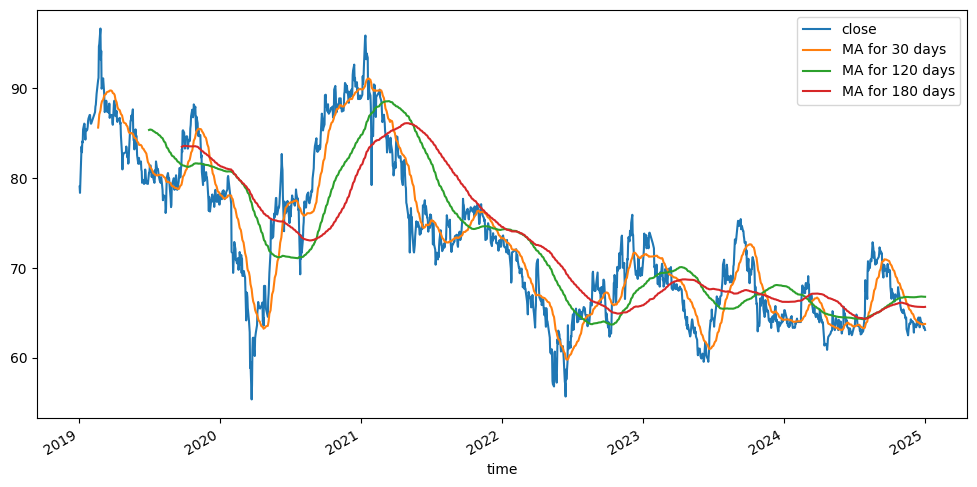

In [20]:
df_VNM[['close','MA for 30 days','MA for 120 days','MA for 180 days']].plot(subplots=False,figsize=(12,6))
plt.show()

<a id='3.3'></a>
## 3.3 'Daily Return Analysis'

Bây giờ chúng ta đã thực hiện một số baseline analysis. Bây giờ chúng ta sẽ phân tích rủi ro của cổ phiếu. Để làm được điều này, chúng ta sẽ cần xem xét kỹ hơn về sự thay đổi hàng ngày của cổ phiếu từ 300 ngày mới nhất.

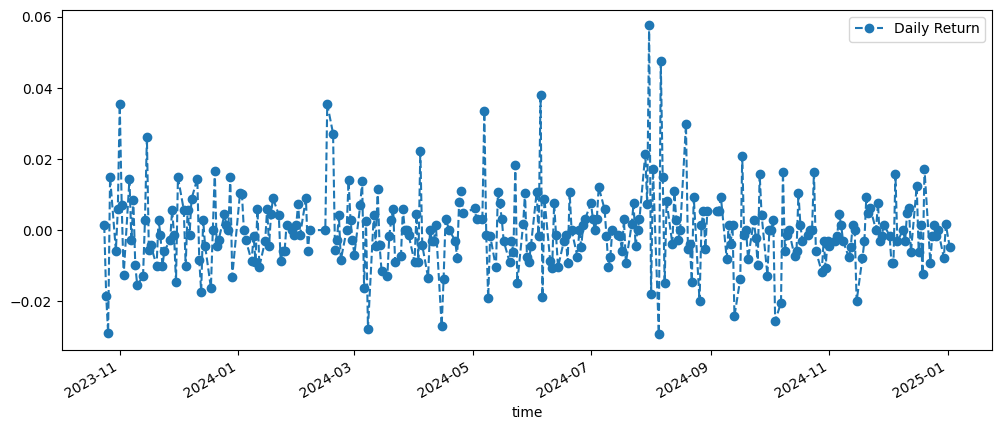

In [25]:
# use pct_change to find the percent change for each day
df_VNM['Daily Return'] = df_VNM['close'].pct_change()
# plot the daily return percentage
df_VNM['Daily Return'][-300:].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

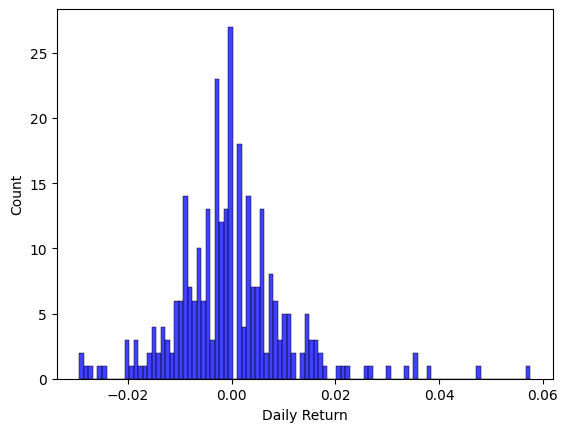

In [27]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(df_VNM['Daily Return'][-300:].dropna(),bins=100,color='blue')
plt.show()

Dựa vào histogram, ta thấy daily return có xu hướng lệch trái, tức có xu hướng giảm nhiều hơn. Đi cùng với đó, ta thấy biên độ giao động của daily return khá lớn, có thể thấy cổ phiếu có rủi ro cao hơn.

<a id='3.4'></a>
## 3.4 Phân tích rủi ro

tham khảo tại : https://github.com/anwarcsebd/stock-market-analysis/blob/master/stock-market-analysis.ipynb

<a id='4.'></a>
# 4. Mô hình

<a id='4.1'></a>
## 4.1. Train Test Split

In [ ]:
X=list(ticker_aav_dataset["<Close>"])
X=[float(x) for x in X]

In [ ]:
validation_size = 0.8
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[-1000:-1000+ train_size], X[-1000+train_size:len(X)]

In [ ]:
print(f" x_train: {len(X_train)}      x_test: {len(X_test)}")

<a id='4.2'></a>
## 4.2. Triển khai mô hình và môi trường

Ta quan tâm đến việc tạo ra một thực thể mà tại đó nó có quyền thực hiện các thao tác mua, bán hoặc giữ cổ phiếu vào mỗi ngày, và mục tiêu cuối cùng là tối đa hóa lợi nhuận mà nó thu được.

Một cách tiếp cận đơn giản là ta sẽ cho thực thể này xử dụng một bảng chiến lượt, bao gồm 3 cột tương ứng với ba actions và N dòng tương ứng với số lượng trạng thái có thể của thị trường. Mỗi dòng sẽ gồm 3 mức điểm để đánh giá cho việc "với trạng thái thị trường như vầy thì actions nào sẽ tốt nhất", số điểm của actions nào càng cao thì càng đại diện cho việc ta nên thực hiện actions đó. Bảng cơ chế này gọi là Q-Table. Tất nhiên, với một Q-table hiệu quả, thực thể sẽ càng perform được tốt hơn (thu được lợi nhuận nhiều hơn), hay có thể hiểu rằng Q-table là một "chiến lược" để thực thể giao dịch chứng khoán

Ta cần tìm ra một Q-Table với hiệu quả như vậy

Ban đầu,để đơn giản, Q - table có thể chứa các giá trị bất kỳ và thực thể sẽ đưa ra hành động dựa trên đấy, do các giá trị trong bảng là "Bất kỳ" nên ta có thể coi các actions mà thực thể này đưa ra có thể mang tính ngẫu nhiên (tức rằng nó không biết gì và đưa ra actions một cách tùy ý).

Sau mỗi một lần đưa ra action, thực thể sẽ nhận được một reward tương ứng. Từ đó, ta cập nhật lại bảng trên theo công thức như sau:

  $$Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_b Q(s', b) - Q(s, a)]$$

ta có thể thấy trong công thức trên có hai phần : reward ngắn hạn và reward dài hạn trong tương lại, discount factor sẽ là trọng số để điều chỉnh rằng chúng ta sẽ ưu tiên bên nào hơn.

Sau khi cập nhật lại bảng trên, thực thể sẽ tiếp tục vòng lập, và Q table vẫn tiếp tục được cập nhật và dần dần hội tụ về một Q-table với hiệu quả cao nhất mà tại đó, thực thể sẽ dần học cách thực hiện các hành động tối ưu để tăng lợi nhuận.

Tuy nhiên, khi xử dụng cấu trúc bảng để thao tác như trên, ta sẽ thấy chúng có một vài vấn đề như sau:  
- Khi không gian trạng thái và hành động lớn, bảng Q trở nên quá lớn để lưu trữ và quản lý. Ví dụ, nếu chúng ta có hàng ngàn trạng thái và hành động, số lượng phần tử trong bảng Q sẽ rất lớn.

- Điều này dẫn đến nhu cầu về bộ nhớ lớn và thời gian tính toán tăng cao.
- Khó xấp xỉ trạng thái,do các trạng thái ở các dòng trong bảng độc lập với nhau, Nhưng trên thực tế, xác suất để các trạng thái giống nhau là  nên khi tồn tại một trạng thái gần giống (nhưng chưa từng xuất hiện trong bảng) thì chúng không thể ước lượng xấp xỉ được. Đều này trực tiếp dẫn đến việc khó khăn trong việc tổng quát hóa.

Từ đây, ta dùng một neural network để xấp xỉ cho các bảng trên.

Ta quay lai việc thực thể đưa ra actions, Tại đây, ta áp dụng một kỹ thuật mang tên Epsilon - greedy. Ở thời kỳ đầu, ta sẽ cho nó đưa ra hành động một cách
ngẫu nhiên, và dần dần chuyển sang đưa ra hành động dựa trên chiến lược mà nó học được.

<a id='4.2.1'></a>
## 4.2.1 Lớp Agent

In [ ]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
from IPython.core.debugger import set_trace
import time
import numpy as np
import random
from collections import deque

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        #State size depends and is equal to the the window size, n previous days
        self.state_size = state_size # normalized previous days,
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen = 1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval

        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.8989
        #self.epsilon_decay = 0.9
        #         <explore: lấy đại>     <exploit: vận dụng>
        # random: ưu tiên       ưu tiên
        # time: -------------------------------------------->
        #self.model = self._model()
        #       1 * 0.9 = 0.9        0.9*0.9 = 0.81         0.81**0.9 = 0.7xx  .....  0.01
        # n = random(0,1):
        # nếu n nằm trong (epsilon,1) thì exploit
        # ngược  lại thì explore

        # time: -------------------------------------------->

        self.model = load_model(model_name) if is_eval else self._model()

    #Deep Q Learning model- returns the q-value when given state as input
    def _model(self):
        model = Sequential()
        #Input Layer
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        #Hidden Layers
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        #Output Layer
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(learning_rate=0.002))
        return model

    #Return the action on the value function
    #With probability (1-$\epsilon$) choose the action which has the highest Q-value.
    #With probability ($\epsilon$) choose any action at random.
    #Intitially high epsilon-more random, later less
    #The trained agents were evaluated by different initial random condition
    #and an e-greedy policy with epsilon 0.05. This procedure is adopted to minimize the possibility of overfitting during evaluation.

    def act(self, state):
        #If it is test and self.epsilon is still very high, once the epsilon become low, there are no random
        #actions suggested.
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        options = self.model.predict(state, verbose =0)
        #set_trace()
        #action is based on the action that has the highest value from the q-value function.
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])

        # the memory during the training phase.
        for state, action, reward, next_state, done in mini_batch:
            # start_t = time.time()
            target = reward # reward or Q at time t
            #update the Q table based on Q table equation
            #set_trace()
            if not done:
                #set_trace()
                #max of the array of the predicted.
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose =0)[0])

            # Q-value of the state currently from the table
            target_f = self.model.predict(state, verbose =0)
            # Update the output Q table for the given action in the table
            target_f[0][action] = target
            #train and fit the model where state is X and target_f is Y, where the target is updated.
            self.model.fit(state, target_f, epochs=1, verbose=0)
            # end_t = time.time()

            # print(f" \n time {end_t - start_t}")


        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

<a id='4.2.2'></a>
## 4.2.2 Hàm bổ trợ

In [ ]:
import numpy as np
import math

# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def progress_bar(current, total, bar_length=20):
    """Hiển thị thanh trạng thái cho env.run.

    Args:
        current: Ngày hiện tại.
        total: Tổng số ngày.
        bar_length: Chiều dài của thanh trạng thái.
    """
    percent = float(current) / total
    arrow = '-' * int(round(percent * bar_length) - 1) + '>'
    spaces = ' ' * (bar_length - len(arrow))

    sys.stdout.write(f'\rTiến trình: [{arrow}{spaces}] {int(round(percent * 100))}%\t Ngày hiện tại: {current}')
    sys.stdout.flush()

    if current == total:
        sys.stdout.write('\n')
        sys.stdout.flush()

# ... (mã hiện tại của bạn)

# returns an an n-day state representation ending at time t



<a id='4.2.3'></a>
## 4.2.3 Lớp Môi trường

In [ ]:
class TradingEnv:
    def __init__(self, data, window_size, batch_size, episode_count, learning_interval, is_val = False):
        self.data = data
        self.window_size = window_size
        self.batch_size = batch_size
        self.episode_count = episode_count
        self.learning_interval = learning_interval
        self.agent = Agent(window_size)
        self.state = None
        self.total_profit = 0
        self.inventory = []
        self.states_sell = []
        self.states_buy = []
        self.memory = []
        self.is_val = is_val

    def reset(self):
        self.state = self.getState(0, self.window_size + 1)
        self.total_profit = 0
        self.inventory = []
        self.states_sell = []
        self.states_buy = []
        self.agent.memory = []


    #lấy chênh lệch giá từ ngày t đến ngày t-n+1:
    #nhìn lại n ngày trước đó
    def getState(self, t, n):
        d = t - n + 1
        block = self.data[d:t + 1] if d >= 0 else -d * [self.data[0]] + self.data[0:t + 1] # pad with t0
        #block is which is the for [1283.27002, 1283.27002]
        res = []
        # print(f"n {n}   block {len(block)}")
        for i in range(n - 1):
            res.append(sigmoid(block[i + 1] - block[i]))
        return np.array([res])


    """
    FOR EVERY STATE:
        #1 đưa ra quyết định (mua, giữ, bán)
          #2.1 nhận lấy state tiếp theo (độ chênh giá tính từ ngày mai)
          #2.2 tính toán reward tương ứng cho hành động của mình
        #3 cập nhật memory
        #4 chuyển qua state tiếp theo
        #5 Nếu như tới lúc để cập nhật lại thì gọi replay để cập nhật model
        #5 trả về: (state sau đó, reward tương ứng, và ?đã hết dữ liệu chưa)

    """
    def step(self, t):
        action = self.agent.act(self.state)

        if t != len(self.data) - 1:
          next_state = self.getState(t + 1, self.window_size + 1)
        else :
          next_state = None

        reward = 0

        if action == 1:  # buy
            self.inventory.append(self.data[t])
            self.states_buy.append(t)

        elif action == 2 and len(self.inventory) > 0:  # sell
            bought_price = self.inventory.pop(0)
            reward = max(self.data[t] - bought_price, 0)
            self.total_profit += self.data[t] - bought_price
            self.states_sell.append(t)

        done = t == len(self.data) - 1

        self.agent.memory.append((self.state, action, reward, next_state, done))
        self.state = next_state

        if (len(self.agent.memory) % self.learning_interval == 0) and (len(self.agent.memory) > 0):
          if not self.is_val:
            # print(f" {len(self.agent.memory)}    {self.batch_size}")
            self.agent.expReplay(min(len(self.agent.memory), self.batch_size) )

        return self.state, reward, done

    """
    WORKFLOW:
      #1 với từng episode: (tìm hiểu thêm về episode ?): train lập lại episode_count lần với cùng một weight của model
        #2 dọn memory của models, dọn lại env
        #3 Với từng ngày trôi quá:
          #4 thực hiện công việc trong step (dưa ra action, nhận reward, chuyển trạng thái)
          #5 in kết quả khi chạy xong dữ liệu
        # save models mỗi 2 lần chạy xong episode

    """
    def run(self,tracking = 1):
        for e in range(self.episode_count):
            self.reset()
            print(f"{e}")
            for t in range(len(self.data)):
                # print(f"t {t} ")
                progress_bar(t + 1, len(self.data))
                state, reward, done = self.step(t)
                if done and tracking:
                    print("--------------------------------")
                    print(f"Total Profit: {formatPrice(self.total_profit)}")
                    print("--------------------------------")
                    self.plot_behavior()
                    break
            if  (not self.is_val):
                self.agent.model.save(f"model_ep{e}.keras")

    def plot_behavior(self):
        plt.figure(figsize=(10,5))
        plt.plot(self.data, color='r', lw=2.)
        plt.plot(self.data, 'v', markersize=10, color='m', label='Selling signal', markevery=self.states_sell)
        plt.plot(self.data, '^', markersize=10, color='k', label='Buying signal', markevery=self.states_buy)
        plt.title('Total gains: %f'%self.total_profit)
        plt.legend()
        plt.show()


    def test_model(self, test_data, model_name):
        self.data = test_data  # Cập nhật dữ liệu cho môi trường kiểm tra
        self.agent = Agent(self.window_size, is_eval=True, model_name=model_name)  # Tạo agent mới để đánh giá
        self.reset()  # Khởi tạo lại môi trường

        for t in range(len(self.data)):
            progress_bar(t + 1, len(self.data))  # Hiển thị thanh trạng thái
            state, reward, done = self.step(t)  # Thực hiện bước mô phỏng
            if done:
                print("------------------------------------------")
                print("Total Profit: " + formatPrice(self.total_profit))
                print("------------------------------------------")
                self.plot_behavior()  # Vẽ biểu đồ hành vi
                break




<a id='4.3'></a>
## 4.3. Huấn luyện

In [ ]:
data = X_train
env = TradingEnv(data, window_size=1, batch_size=32, episode_count=6, learning_interval=1)
env.run(tracking = 1)

In [ ]:
#Deep Q-Learning Model
print(env.agent.model.summary())

<a id='4.4'></a>
## 4.4. Đánh giá mô hình

In [ ]:
data = X_test  # Dữ liệu kiểm tra
env.test_model(data, "model_ep7.keras")  # Đánh giá model với tên "model_ep4.keras"

<a id='5.'></a>
# 5. Kết luận